In [0]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-03-12')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-05,299.549988,291.410004,295.519989,292.920013,46893200.0,292.920013
2020-03-06,290.820007,281.230011,282.000000,289.029999,56544200.0,289.029999
2020-03-09,278.089996,263.000000,263.750000,266.170013,71686200.0,266.170013


In [3]:
#Get the number of rows and columns in the data set
df.shape

(2060, 6)

C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


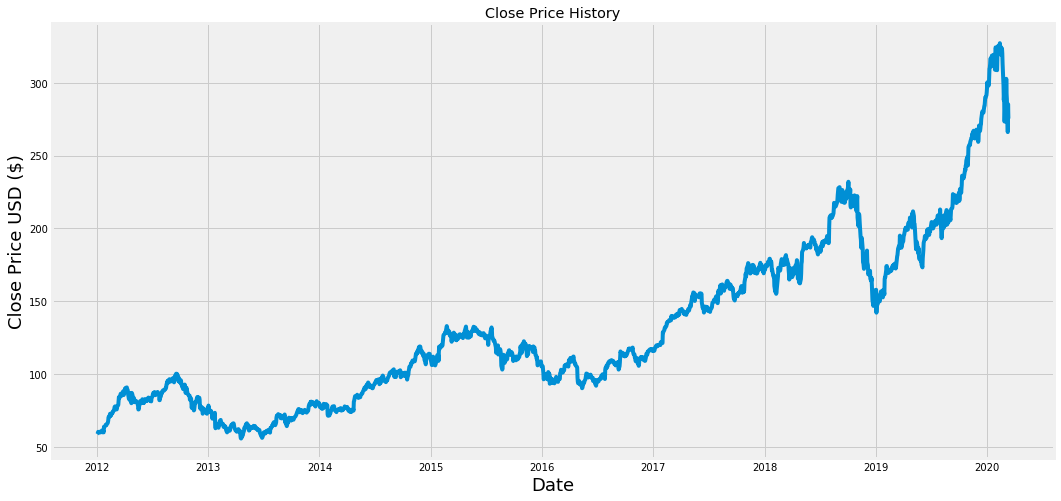

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1648

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.77513726],
       [0.84576834],
       [0.80925531]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [8]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1588, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1588/1588 [==============================] - 112s 70ms/step - loss: 5.8343e-04


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.39950627, 0.39250581, 0.40333808, ..., 0.49596547, 0.50141851,
        0.49979734],
       [0.39250581, 0.40333808, 0.41748646, ..., 0.50141851, 0.49979734,
        0.50042369],
       [0.40333808, 0.41748646, 0.4450094 , ..., 0.49979734, 0.50042369,
        0.50554509],
       ...,
       [0.78364836, 0.7920857 , 0.79462799, ..., 0.90987797, 0.87369663,
        0.85936402],
       [0.7920857 , 0.79462799, 0.80822366, ..., 0.87369663, 0.85936402,
        0.77513726],
       [0.79462799, 0.80822366, 0.82557745, ..., 0.85936402, 0.77513726,
        0.84576834]])

In [16]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test

array([[[0.39950627],
        [0.39250581],
        [0.40333808],
        ...,
        [0.49596547],
        [0.50141851],
        [0.49979734]],

       [[0.39250581],
        [0.40333808],
        [0.41748646],
        ...,
        [0.50141851],
        [0.49979734],
        [0.50042369]],

       [[0.40333808],
        [0.41748646],
        [0.4450094 ],
        ...,
        [0.49979734],
        [0.50042369],
        [0.50554509]],

       ...,

       [[0.78364836],
        [0.7920857 ],
        [0.79462799],
        ...,
        [0.90987797],
        [0.87369663],
        [0.85936402]],

       [[0.7920857 ],
        [0.79462799],
        [0.80822366],
        ...,
        [0.87369663],
        [0.85936402],
        [0.77513726]],

       [[0.79462799],
        [0.80822366],
        [0.82557745],
        ...,
        [0.85936402],
        [0.77513726],
        [0.84576834]]])

In [17]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[190.57   ],
       [190.77095],
       [191.06915],
       [191.57816],
       [192.08165],
       [192.19052],
       [191.96486],
       [191.6201 ],
       [192.42636],
       [194.37799],
       [196.80832],
       [199.35757],
       [201.48851],
       [203.179  ],
       [204.61632],
       [205.61366],
       [206.40929],
       [207.09946],
       [207.70935],
       [208.53609],
       [209.83685],
       [211.02496],
       [211.9879 ],
       [212.72627],
       [213.30913],
       [213.81494],
       [214.41226],
       [215.17857],
       [216.29926],
       [217.70299],
       [219.38187],
       [221.10138],
       [222.4991 ],
       [223.17636],
       [223.20827],
       [222.57532],
       [222.24173],
       [221.7974 ],
       [221.91887],
       [222.04974],
       [221.55276],
       [220.82343],
       [220.05634],
       [219.52702],
       [218.93063],
       [218.70221],
       [218.83842],
       [218.96991],
       [219.57036],
       [220.43182],


In [18]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.520997494164419

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


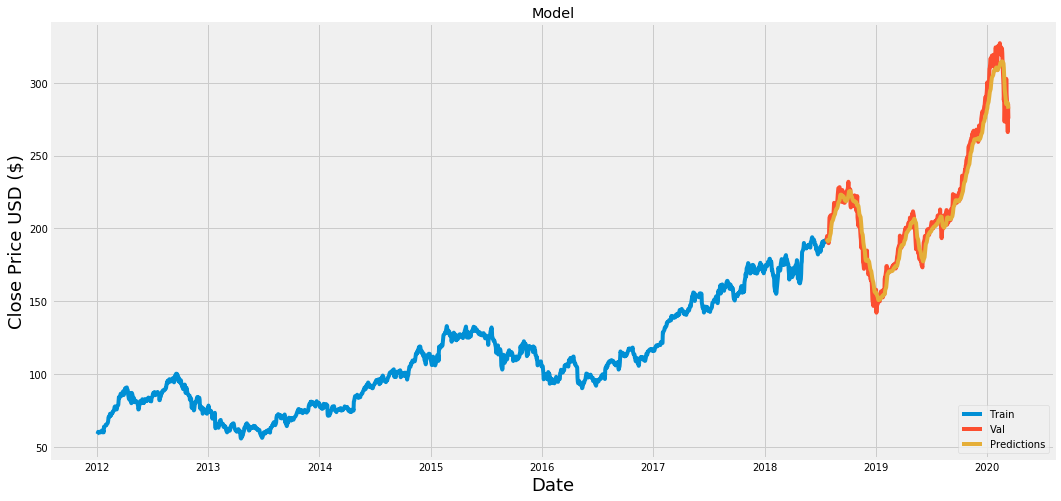

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-23,191.610001,190.570007
2018-07-24,193.000000,190.770950
2018-07-25,194.820007,191.069153
2018-07-26,194.210007,191.578156
2018-07-27,190.979996,192.081650
...,...,...
2020-03-05,292.920013,285.732605
2020-03-06,289.029999,286.207367
2020-03-09,266.170013,286.278778


In [21]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-03-12')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[280.20767]]


In [22]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2020-03-12')
print(apple_quote2['Close'])

Date
2019-12-17    280.410004
2019-12-18    279.739990
2019-12-19    280.019989
2019-12-20    279.440002
2019-12-23    284.000000
2019-12-24    284.269989
2019-12-26    289.910004
2019-12-27    289.799988
2019-12-30    291.519989
2019-12-31    293.649994
2020-01-02    300.350006
2020-01-03    297.429993
2020-01-06    299.799988
2020-01-07    298.390015
2020-01-08    303.190002
2020-01-09    309.630005
2020-01-10    310.329987
2020-01-13    316.959991
2020-01-14    312.679993
2020-01-15    311.339996
2020-01-16    315.239990
2020-01-17    318.730011
2020-01-21    316.570007
2020-01-22    317.700012
2020-01-23    319.230011
2020-01-24    318.309998
2020-01-27    308.950012
2020-01-28    317.690002
2020-01-29    324.339996
2020-01-30    323.869995
2020-01-31    309.510010
2020-02-03    308.660004
2020-02-04    318.850006
2020-02-05    321.450012
2020-02-06    325.209991
2020-02-07    320.029999
2020-02-10    321.549988
2020-02-11    319.609985
2020-02-12    327.200012
2020-02-13    324.86